In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart.csv")

In [7]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [10]:
df.columns = new_columns

In [13]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak","target"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [16]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


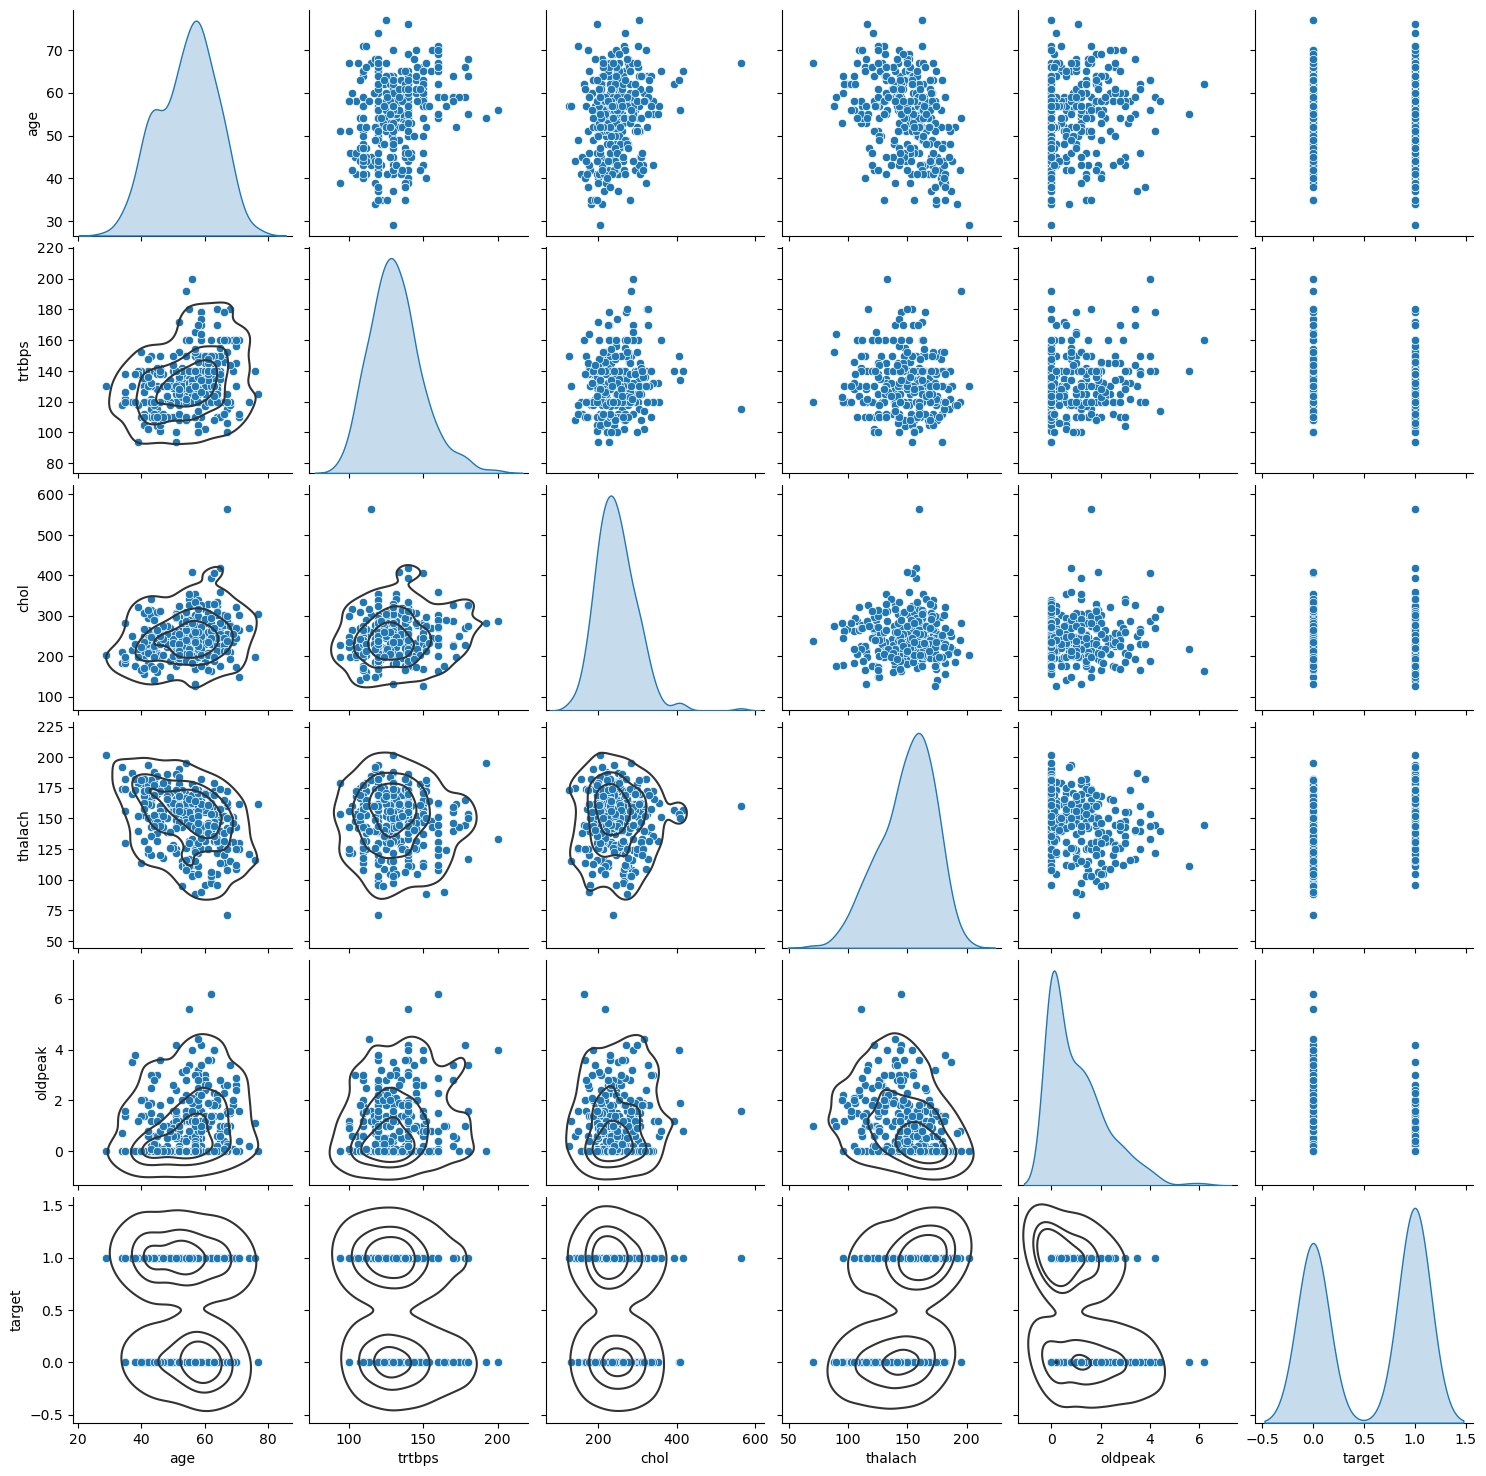

In [24]:
graph = sns.pairplot(df[numeric_var],diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels=4, color = ".2")
plt.show()

#### Feature Scaling

Scaling = Verilerdeki ölçek farklarını ortadan kaldırır (örneğin, biri 0-1, diğeri 0-1000 aralığında olan değişkenleri eşitler).
Özellikle ölçeğe duyarlı algoritmalar (örneğin, doğrusal regresyon, SVM) için daha iyi sonuçlar sağlar.

In [27]:
from sklearn.preprocessing import RobustScaler

In [29]:
robust_scaler = RobustScaler()

In [33]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [35]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ,
         0.        ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ,
         0.        ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ,
         0.        ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ,
        -1.        ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ,
        -1.        ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ,
        -1.        ]])

In [37]:
type(scaled_data)

numpy.ndarray

In [47]:
df_scaled = pd.DataFrame(scaled_data,columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0.0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0.0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0.0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0.0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.0
